# Methods of Estimations

In `Orbit`, we support three methods to estimate model parameters (a.k.a posteriors in Bayesian).

1. Maximum a Posteriori (MAP)
2. Full Bayesian estimation
3. Aggregated posterior estimation


In [1]:
%matplotlib inline

import orbit
from orbit.utils.dataset import load_iclaims
from orbit.models.ets import ETSMAP, ETSFull, ETSAggregated
from orbit.diagnostics.plot import plot_predicted_data

In [2]:
assert orbit.__version__ == '1.0.13dev'

In [3]:
# load data
df = load_iclaims()
test_size = 52
train_df = df[:-test_size]
test_df = df[-test_size:]
response_col = 'claims'
date_col = 'week'

## Maximum a Posteriori (MAP)

In general, we use the naming convention of `[TheModel]MAP` to represent a model class using MAP estimation. You will find the usage of `ETSMAP` here, and `DLTMAP` and `LGTMAP` in the later sections.  The advantage of MAP estimation is a faster computational speed. We also provide inference for MAP method, with the caveat that the uncertainty is mainly generated by the noise process and as such we may not observe the uncertainty band from seasonality or other components.

In [4]:
%%time
ets = ETSMAP(
    response_col=response_col,
    date_col=date_col,
    seasonality=52,
    seed=8888,
)
ets.fit(df=train_df)
predicted_df = ets.predict(df=test_df)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_982090c5656030fa038b63e5c383dbff NOW.


CPU times: user 1.3 s, sys: 148 ms, total: 1.45 s
Wall time: 44.3 s


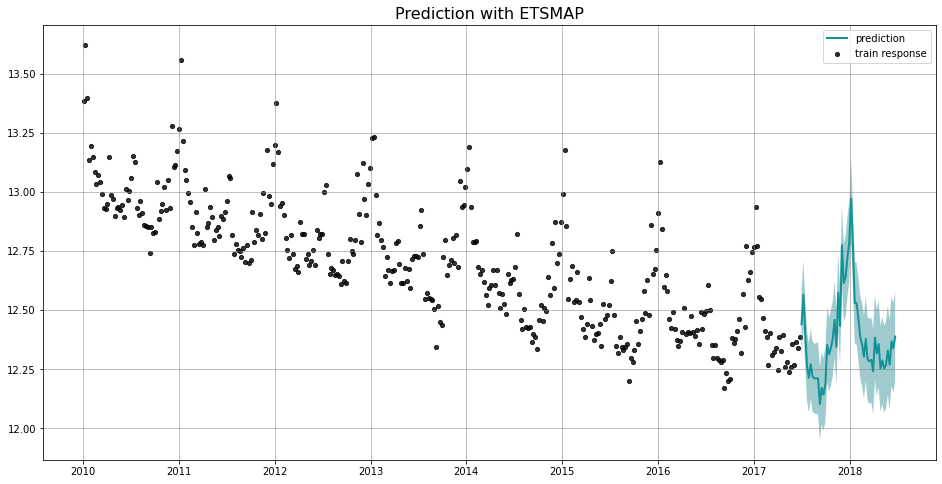

In [5]:
_ = plot_predicted_data(train_df, predicted_df, date_col, response_col, title='Prediction with ETSMAP')

## Full Bayesian Estimation

We use the naming convention of `[TheModel]Full` to represent a model using full Bayesian estimation.  For example, you will find the usage of `ETSFull` here, and `DLTFull` and `LGTFull` in the later sections.  Compared to MAP, it usually takes longer time to fit a full Bayesian models where **No-U-Turn Sampler (NUTS)** [(Hoffman and Gelman 2011)](https://arxiv.org/abs/1111.4246) is carried out under the hood. The advantage is that the inference and estimation are usually more robust.

In [6]:
%%time
ets = ETSFull(
    response_col=response_col,
    date_col=date_col,
    seasonality=52,
    seed=8888,
    num_warmup=400,
    num_sample=400,
)
ets.fit(df=train_df)
predicted_df = ets.predict(df=test_df)

CPU times: user 396 ms, sys: 53.8 ms, total: 450 ms
Wall time: 1.14 s


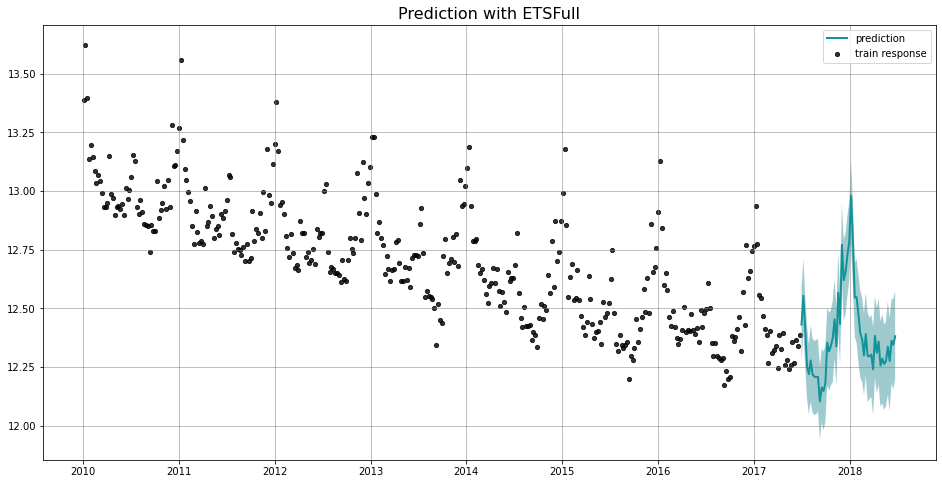

In [7]:
_ = plot_predicted_data(train_df, predicted_df, date_col, response_col, title='Prediction with ETSFull')

You can also access the posterior samples by the attribute of `._posterior_samples` as a `dict`.

In [8]:
ets._posterior_samples.keys()

odict_keys(['l', 'lev_sm', 'obs_sigma', 's', 'sea_sm', 'lp__'])

## Aggregated Posteriors

We use the naming convention of `[TheModel]Aggregated` to represent a model using aggregated posteriors for prediction. For example, you will find the usage of `ETSAggregated` here, and `DLTAggregated` and `LGTAggregated` in later section.  Just like the full Bayesian method, it runs through the MCMC algorithm which is **NUTS** by default. The difference from a full model is that aggregated model first aggregates the posterior samples based on mean or median (via `aggregate_method`) then does the prediction using the aggreated posterior.

In [9]:
%%time
ets = ETSAggregated(
    response_col=response_col,
    date_col=date_col,
    seasonality=52,
    seed=8888,
)
ets.fit(df=train_df)
predicted_df = ets.predict(df=test_df)

CPU times: user 589 ms, sys: 123 ms, total: 712 ms
Wall time: 1.55 s


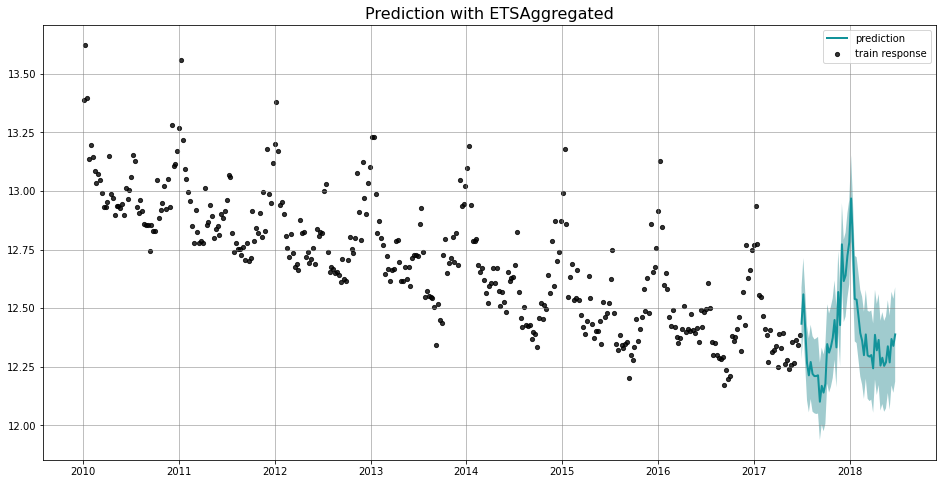

In [10]:
_ = plot_predicted_data(train_df, predicted_df, date_col, response_col, title='Prediction with ETSAggregated')

For users who are interested in the two `Orbit` refined models -- *DLT* and *LGT*.  There are sections designated to the discussion of the details.